In [27]:
# import relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.metrics import root_mean_squared_error

In [28]:
# import the data and  drop no longer needed columns including redundant first category
video_df = pd.read_csv("data/videos_prepared.csv")

remove_columns = ["video_id", "title", "channel_title", "cat_Comedy"]
video_df.drop(columns=remove_columns, inplace=True)
video_df.head()

,caption,hour_published,weekday_published,month_published,is_short,hd,tag_vegan,tag_veganism,tag_animal rights,tag_earthling ed|earthlinged,...,cat_Gaming,cat_Howto & Style,cat_Music,cat_News & Politics,cat_Nonprofits & Activism,cat_People & Blogs,cat_Pets & Animals,cat_Science & Technology,cat_Sports,cat_Travel & Events
0,0,0,6,11,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,20,4,4,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,18,3,10,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,19,0,11,1,1,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1,20,2,10,0,1,1,1,0,1,...,0,0,0,0,1,0,0,0,0,0


In [29]:
# split into features and target variable
X = video_df.drop(columns="box_view_rate")
y = video_df["box_view_rate"]

# split into training and test data
SEED = 666
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)
X_train.head()

,caption,hour_published,weekday_published,month_published,is_short,hd,tag_vegan,tag_veganism,tag_animal rights,tag_earthling ed|earthlinged,...,cat_Gaming,cat_Howto & Style,cat_Music,cat_News & Politics,cat_Nonprofits & Activism,cat_People & Blogs,cat_Pets & Animals,cat_Science & Technology,cat_Sports,cat_Travel & Events
50,0,11,0,11,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
397,0,1,5,9,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
349,0,1,0,10,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
346,0,16,3,1,1,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
759,0,4,2,3,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [30]:
# instantiate the scaler, fit it to training data and transform training and test features
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)
X_train_scaled.head()

,caption,hour_published,weekday_published,month_published,is_short,hd,tag_vegan,tag_veganism,tag_animal rights,tag_earthling ed|earthlinged,...,cat_Gaming,cat_Howto & Style,cat_Music,cat_News & Politics,cat_Nonprofits & Activism,cat_People & Blogs,cat_Pets & Animals,cat_Science & Technology,cat_Sports,cat_Travel & Events
50,-0.355903,-0.523864,-1.470070,1.403595,-0.800485,0.279553,-1.011905,-0.588739,-0.450385,-0.347939,...,-0.054473,-0.170057,-0.094632,-0.20787,-0.713392,2.011163,-0.187675,-0.309231,-0.03849,-0.094632
397,-0.355903,-2.111900,1.100461,0.827674,1.249242,0.279553,-1.011905,-0.588739,-0.450385,-0.347939,...,-0.054473,-0.170057,-0.094632,-0.20787,-0.713392,-0.497225,-0.187675,-0.309231,-0.03849,10.567245
349,-0.355903,-2.111900,-1.470070,1.115634,-0.800485,-3.577138,0.988235,-0.588739,-0.450385,-0.347939,...,-0.054473,-0.170057,-0.094632,-0.20787,1.401753,-0.497225,-0.187675,-0.309231,-0.03849,-0.094632
346,-0.355903,0.270154,0.072249,-1.476011,1.249242,0.279553,0.988235,-0.588739,-0.450385,-0.347939,...,-0.054473,-0.170057,-0.094632,-0.20787,-0.713392,2.011163,-0.187675,-0.309231,-0.03849,-0.094632
759,-0.355903,-1.635489,-0.441858,-0.900090,-0.800485,0.279553,-1.011905,-0.588739,-0.450385,-0.347939,...,-0.054473,-0.170057,-0.094632,-0.20787,-0.713392,2.011163,-0.187675,-0.309231,-0.03849,-0.094632


In [31]:
# find the optimal alpha value using lasso for feature selection to fit linear regression using r2 and rmse metrics
alpha = [0.001, 0.01, 0.1, 0.2, 0.3]
r2 = []
rmse = []

for a in alpha:
    lasso = Lasso(alpha=a, max_iter=6000)
    lasso.fit(X_train_scaled, y_train)
    X_train = X_train_scaled.iloc[:, lasso.coef_ > 0]
    X_test = X_test_scaled.iloc[:, lasso.coef_ > 0]
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    r2.append(linreg.score(X_test, y_test))
    rmse.append(root_mean_squared_error(y_test, y_pred))

alpha_scores = pd.DataFrame({"alpha": alpha, "r2": r2, "rmse": rmse})
alpha_scores

,alpha,r2,rmse
0,0.001,0.630476,1.967072
1,0.010,0.605352,2.032842
2,0.100,0.586360,2.081182
3,0.200,0.463066,2.371150
4,0.300,0.450641,2.398428


In [32]:
# use optimal alpha value for lasso
lasso = Lasso(alpha=alpha_scores["alpha"][alpha_scores["r2"] == alpha_scores["r2"].max()].iloc[0], max_iter=6000)
lasso.fit(X_train_scaled, y_train)
X_train_lasso = X_train_scaled.iloc[:, lasso.coef_ > 0]
X_test_lasso = X_test_scaled.iloc[:, lasso.coef_ > 0]
X_train_lasso.head()

,caption,hd,tag_animal rights,tag_earthling ed|earthlinged,tag_animals,tag_plant-based,tag_vegetarian,tag_debate,tag_count,term_20,...,log_channel_sub_count,log_duration_seconds,cat_Education,cat_Film & Animation,cat_Gaming,cat_Howto & Style,cat_Music,cat_People & Blogs,cat_Pets & Animals,cat_Sports
50,-0.355903,0.279553,-0.450385,-0.347939,-0.323381,-0.309231,-0.337155,-0.394405,-0.944647,-0.257115,...,-0.730278,0.840739,-0.270214,-0.094632,-0.054473,-0.170057,-0.094632,2.011163,-0.187675,-0.03849
397,-0.355903,0.279553,-0.450385,-0.347939,-0.323381,-0.309231,-0.337155,-0.394405,-0.944647,-0.257115,...,-1.117665,-1.674296,-0.270214,-0.094632,-0.054473,-0.170057,-0.094632,-0.497225,-0.187675,-0.03849
349,-0.355903,-3.577138,-0.450385,-0.347939,-0.323381,-0.309231,-0.337155,-0.394405,0.194592,-0.257115,...,-0.259681,1.070980,-0.270214,-0.094632,-0.054473,-0.170057,-0.094632,-0.497225,-0.187675,-0.03849
346,-0.355903,0.279553,-0.450385,-0.347939,-0.323381,3.233825,-0.337155,-0.394405,1.333831,-0.257115,...,-2.036339,-1.286993,-0.270214,-0.094632,-0.054473,-0.170057,-0.094632,2.011163,-0.187675,-0.03849
759,-0.355903,0.279553,-0.450385,-0.347939,-0.323381,-0.309231,-0.337155,-0.394405,1.865476,-0.257115,...,0.838587,0.521102,-0.270214,-0.094632,-0.054473,-0.170057,-0.094632,2.011163,-0.187675,-0.03849


In [33]:
# fit the linear regression model to the feature extracted data
linreg = LinearRegression()
linreg.fit(X_train_lasso, y_train)
y_pred = linreg.predict(X_test_lasso)
r2 = linreg.score(X_test_lasso, y_test)
rmse = root_mean_squared_error(y_test, y_pred)
print(f"r2: {r2}, rmse: {rmse}")

r2: 0.6304757031767069, rmse: 1.9670720001397262


In [34]:
# list the coefficients by highest absolute value for positive or negative impact on view count
coef_df = pd.Series(linreg.coef_, index=X_train_lasso.columns).sort_values(key=abs, ascending=False)
top_coef = coef_df.head(20)
top_coef

log_channel_view_count    1.393318
term_sub                  0.748793
term_joeycarbstrong       0.650323
term_vegangains           0.632753
term_getveganhelp         0.517553
term_truth                0.505938
cat_Education             0.485021
term_therammsden         -0.465882
cat_Howto & Style         0.458687
log_channel_sub_count     0.399842
cat_People & Blogs        0.386064
term_glory               -0.381609
term_instagram            0.323592
term_youtu                0.321371
term_supporter            0.320165
term_debate               0.311399
term_surge                0.310661
term_carnivore            0.298581
term_pubmed               0.286779
term_facebook            -0.271185
dtype: float64

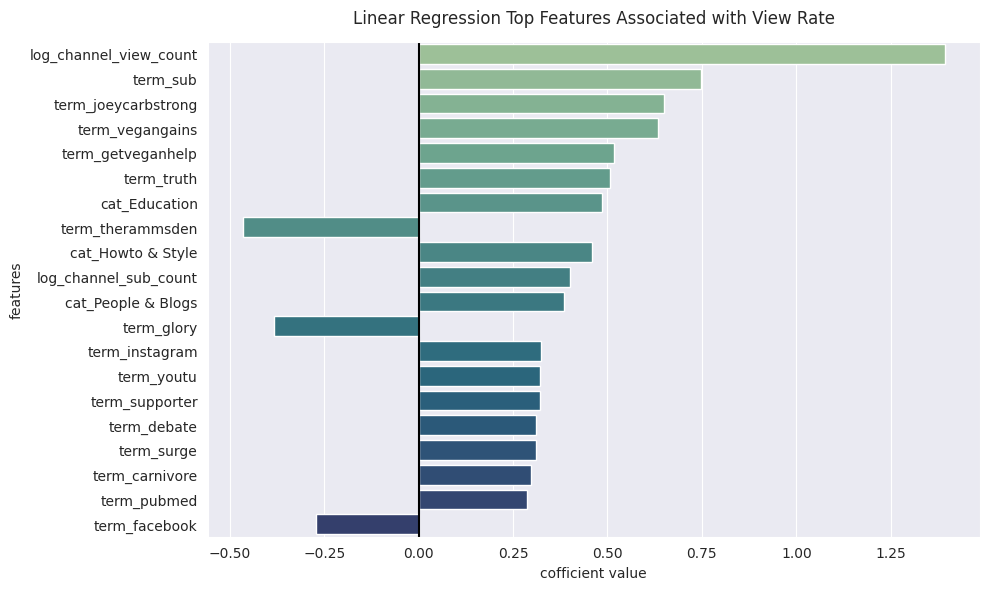

In [35]:
# visualize top feature coefficients
sns.set_style("darkgrid")
plt.subplots(figsize=(10, 6))
sns.barplot(x=top_coef.values, y=top_coef.index, palette="crest", hue=top_coef.index, legend=False, orient="h")
plt.axvline(0, color="black")
plt.title("Linear Regression Top Features Associated with View Rate", y=1.02)
plt.ylabel("features")
plt.xlabel("cofficient value")
plt.tight_layout()

# save png
plt.savefig("images/linreg_top_features.png", dpi=300)

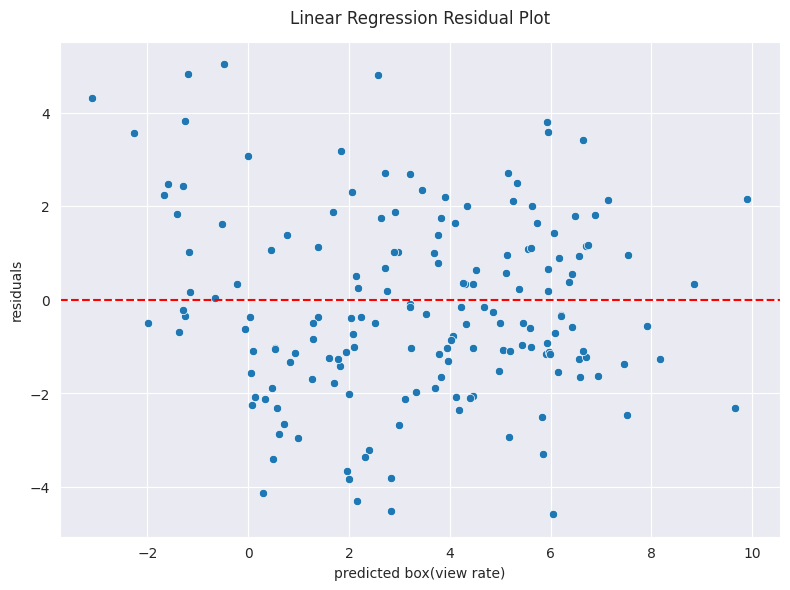

In [36]:
# visualize residuals to look for patterns
residuals = y_test - y_pred
plt.subplots(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("predicted box(view rate)")
plt.ylabel("residuals")
plt.title("Linear Regression Residual Plot", y=1.02)
plt.tight_layout()

# save png
plt.savefig("images/linreg_residual_plot")

In [37]:
# re-load video dataframe for video information
video_df = pd.read_csv("data/videos_prepared.csv")

# highest channel view count videos by highest video view rate
video_df["max_view_rate"] = video_df["box_view_rate"].max()
top_10_chan_view_count = video_df[["channel_title", "title", "log_channel_view_count", "box_view_rate", "max_view_rate"]].sort_values(["log_channel_view_count", "box_view_rate"], ascending=False).head(10)
top_10_chan_view_count

,channel_title,title,log_channel_view_count,box_view_rate,max_view_rate
34,TEDx Talks,Every Argument Against Veganism | Ed Winters |...,22.860034,8.579509,12.066686
715,TEDx Talks,A Plant-based Diet Changed My Life | Pat McAul...,22.860034,7.965115,12.066686
157,TEDx Talks,The Power of Plant-Based Eating | Dr. Joanne K...,22.860034,7.054742,12.066686
239,TEDx Talks,Why I'm A Vegan | Moby | TEDxVeniceBeach,22.860034,6.654406,12.066686
724,TEDx Talks,The Transformative Power of Raw Vegan Food | R...,22.860034,3.952670,12.066686
71,Brut India,Joaquin Phoenix On Why He's Vegan,22.074043,7.363395,12.066686
672,Brut India,Joaquin Phoenix's Powerful Speech on the Envir...,22.074043,2.553250,12.066686
297,Best Of TRS | English,Why Everyone Must Turn Vegetarian? Monk Explai...,20.649403,9.181316,12.066686
98,Big Think,Peter Singer: Animal suffering is human respon...,20.628524,7.224880,12.066686
574,Fitshortie,What I Eat As A Long-Term Raw Vegan,20.565845,9.062872,12.066686


In [38]:
# highest sub view rate
top_10_sub = video_df[["channel_title", "title", "term_sub", "box_view_rate", "max_view_rate"]][video_df["term_sub"] > 0].sort_values(["box_view_rate"], ascending=False).head(10)
top_10_sub

,channel_title,title,term_sub,box_view_rate,max_view_rate
758,David Ramms,Vegan RAGES At Fresh Chicken Nugget Video,0.088870,10.543854,12.066686
7,Mic the Vegan,Cardio vs. Weights: What Actually Helps You Li...,0.040760,9.034174,12.066686
73,David Ramms,Vegan RAGES At Piers Morgan By Playing Bingo (...,0.087788,8.805436,12.066686
257,David Ramms,Tristan Tate DESTROYS vegan with Christianity ✝️,0.086220,6.383796,12.066686
838,Choosing My Health,Before & After My Vegan Diet AND What I’m Doin...,0.027858,6.377017,12.066686
601,David Ramms,When Trolling A Vegetarian BACKFIRES (Instant ...,0.086842,6.097575,12.066686
16,David Ramms,Vegan RAGES at Uncle Roger vs Vegan Video,0.088819,5.003152,12.066686
235,David Ramms,Angry meat eater attacks vegans 😲,0.092584,4.615117,12.066686
405,David Ramms,Vegan RAGES at Bringing Meat To A Vegan Restau...,0.089148,4.520905,12.066686
90,David Ramms,Vegan RAGES at the Worst TikTok Carnivore Cringe,0.088934,4.460120,12.066686


In [39]:
# highest joey carbstrong view rate
top_10_joeycarbstrong = video_df[["channel_title", "title", "term_joeycarbstrong", "box_view_rate", "max_view_rate"]][video_df["term_joeycarbstrong"] > 0].sort_values(["box_view_rate"], ascending=False).head(10)
top_10_joeycarbstrong

,channel_title,title,term_joeycarbstrong,box_view_rate,max_view_rate
345,Joey Carbstrong,I could get sued for releasing this,0.606633,10.490303,12.066686
224,Joey Carbstrong,I left secret cameras in a HALAL Slaughterhous...,0.513909,10.057655,12.066686
81,Joey Carbstrong,BREAKING: WORLD-FIRST EXPOSÉ | HUGE EGG HEN GA...,0.541405,9.729917,12.066686
295,Joey Carbstrong,Media attend Halal Slaughterhouse after shocki...,0.551424,9.147584,12.066686
406,Joey Carbstrong,Dairy Farmer DESTROYS Vegan Activist!,0.538400,8.554261,12.066686
667,Joey Carbstrong,BREAKING: Horror Halal slaughterhouse SHUTS DO...,0.538784,8.482269,12.066686
221,Joey Carbstrong,Muslims react to HALAL slaughter footage,0.493178,8.353002,12.066686
96,Joey Carbstrong,Pigeon kicking punk instantly regrets it (lear...,0.606633,8.274491,12.066686
22,Joey Carbstrong,"Well, that escalated quickly…",0.595599,8.109740,12.066686
324,Joey Carbstrong,Spiritual meat eating animal activist debates ...,0.589007,7.700707,12.066686


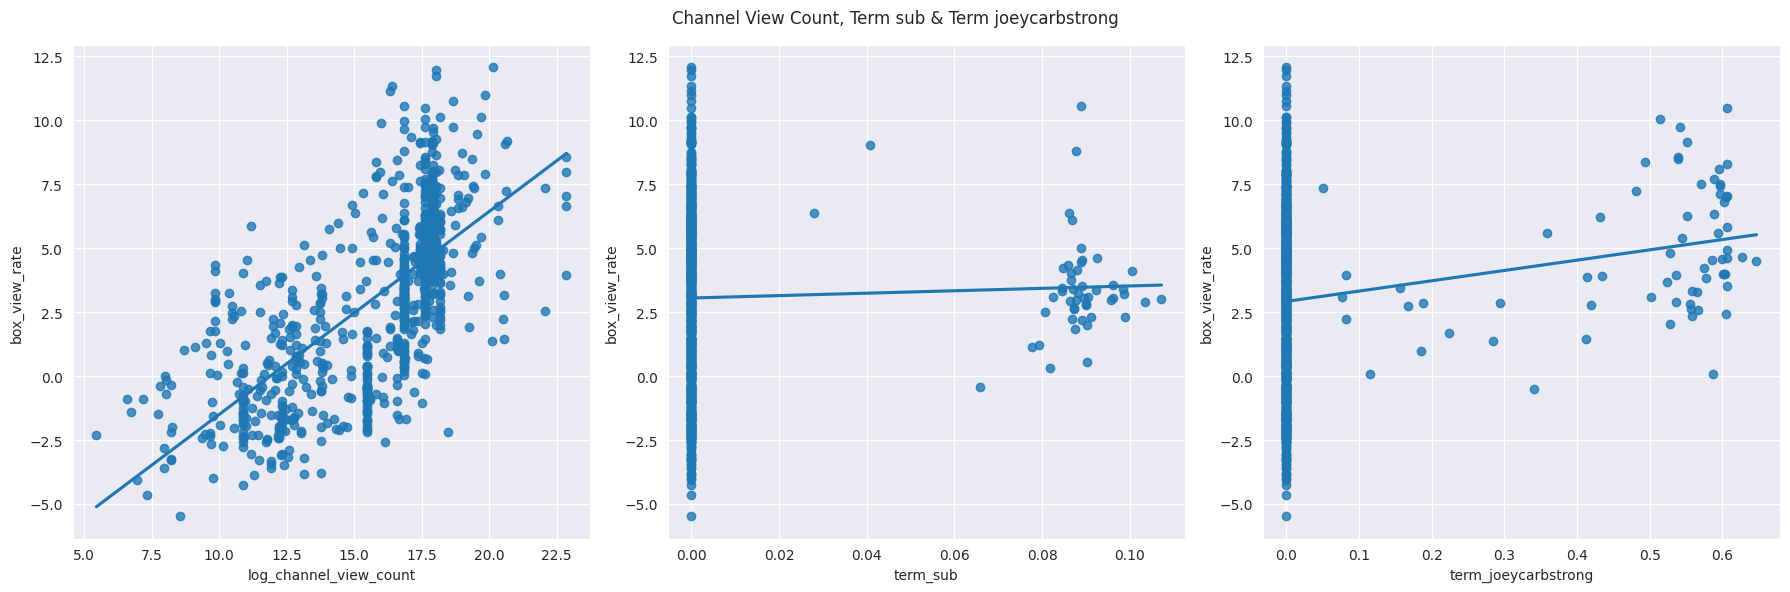

In [40]:
# visualize individual regression lines of coefficients with highest impact on view count
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle("Channel View Count, Term sub & Term joeycarbstrong")
sns.regplot(ax=axes[0], data=video_df, x="log_channel_view_count", y="box_view_rate", ci=None)
sns.regplot(ax=axes[1], data=video_df, x="term_sub", y="box_view_rate", ci=None)
sns.regplot(ax=axes[2], data=video_df, x="term_joeycarbstrong", y="box_view_rate", ci=None)
plt.tight_layout()

plt.savefig("images/top_coefficient_regression_lines.png")